In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
#read file
file= Path("Resources/vgsales.csv")
video_games=pd.read_csv(file)

video_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Data Cleaning 



In [4]:
#check for null values 
video_games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
#drop null values to prevent issues in the data analysis  process 
clean_data=video_games.dropna()

clean_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
#checks that null values have been removed: clean_data.isnull().sum()

In [7]:
#change year dtype to int
clean_data=clean_data.astype({"Year": int})
#remove _ in colum titles 
clean_data=clean_data.rename(columns={"NA_Sales": "NA Sales",
                                     "EU_Sales":"EU Sales",
                                    "JP_Sales":"JP Sales",
                                     "Other_Sales": "Other Sales",
                                      "Global_Sales":"Global Sales"
                                    })

clean_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Top Sales by Genre


In [8]:
#clean_data['Genre'].value_counts()

sales_by_genre=clean_data.groupby('Genre')[['NA Sales', 'EU Sales', 'JP Sales']].sum()
sales_by_genre

,NA Sales,EU Sales,JP Sales
Genre,,,
Action,861.77,516.48,158.65
Adventure,101.93,63.74,51.99
Fighting,220.74,100.00,87.15
Misc,396.92,211.77,106.67
Platform,445.99,200.65,130.65
Puzzle,122.01,50.52,56.68
Racing,356.93,236.31,56.61
Role-Playing,326.50,187.57,350.29
Shooter,575.16,310.45,38.18


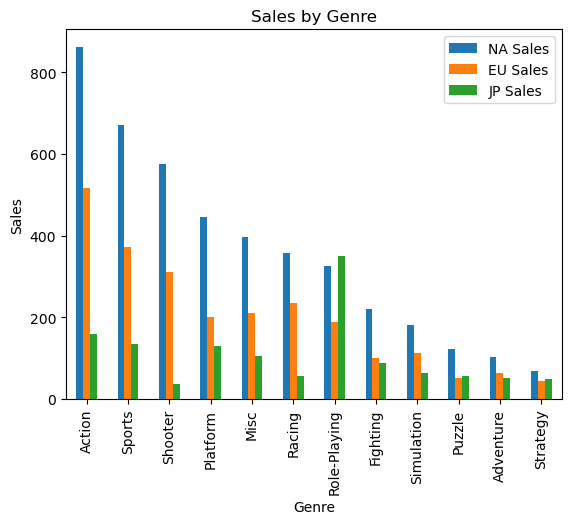

In [9]:
#Generate a bar plot where the genre is on the x axis and the  sum of sales  is on the y axis. 
sales_by_genre=sales_by_genre.sort_values(by="NA Sales", ascending= False)
sales_by_genre.plot(kind='bar')
plt.title("Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Sales")
plt.show()

# Trend of sales over the years 

In [10]:
#code 

In [11]:
#graph (line graph)

# Most popular platforms

In [12]:
NAsales_by_platform=clean_data.groupby('Platform')[['NA Sales']].sum()

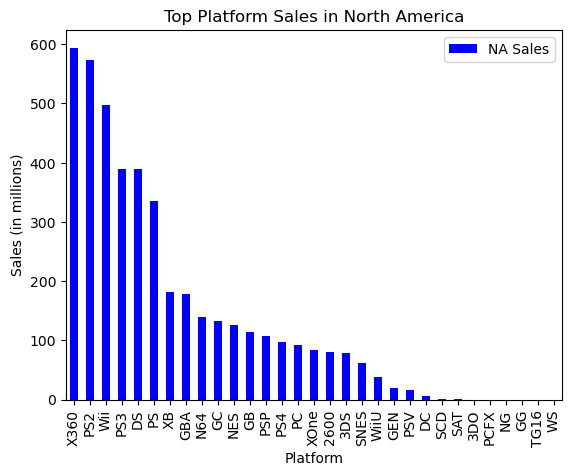

In [13]:
NAsales_by_platform=NAsales_by_platform.sort_values(by="NA Sales", ascending= False)
NAsales_by_platform.plot(kind='bar', color="b")
plt.title("Top Platform Sales in North America")
plt.xlabel("Platform")
plt.ylabel("Sales (in millions)")
plt.show()

In [14]:
EUsales_by_platform=clean_data.groupby('Platform')[['EU Sales']].sum()

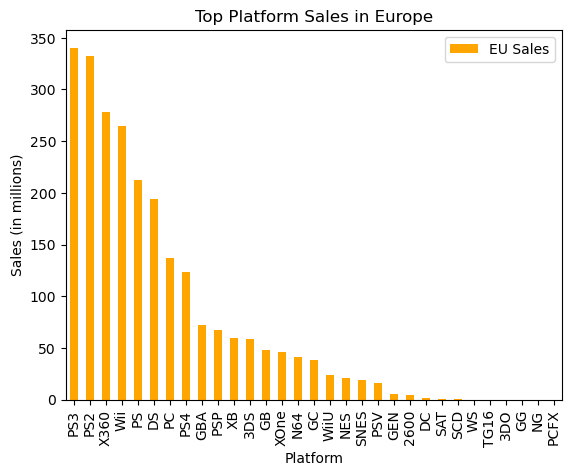

In [15]:
EUsales_by_platform=EUsales_by_platform.sort_values(by="EU Sales", ascending= False)
EUsales_by_platform.plot(kind='bar', color="orange")
plt.title("Top Platform Sales in Europe")
plt.xlabel("Platform")
plt.ylabel("Sales (in millions)")
plt.show()

In [16]:
JPsales_by_platform=clean_data.groupby('Platform')[['JP Sales']].sum()

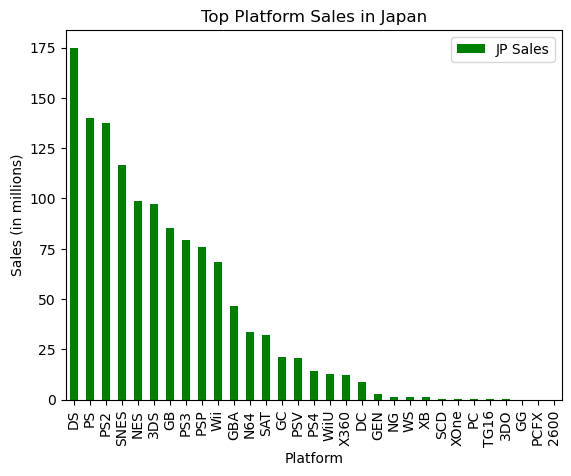

In [17]:
JPsales_by_platform=JPsales_by_platform.sort_values(by="JP Sales", ascending= False)
JPsales_by_platform.plot(kind='bar', color="green")
plt.title("Top Platform Sales in Japan")
plt.xlabel("Platform")
plt.ylabel("Sales (in millions)")
plt.show()